# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for dimensionality reduction and anomaly detection.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)
### Task 1.1. (1 point)
Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).
1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf
2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

#### Your solution:

$\langle\langle\textbf{Your Latex Code}\rangle\rangle$

$$min_{w \in F}  \frac{1}{2} \|w \|^{2} + \frac{1}{\nu \mathcal{l}} \sum_{i} \varepsilon_{i} - \rho \dots \,(1)$$ .


- with $w \in F$, $\varepsilon \in \mathbb{R}^{t}$, $ \rho \in \mathbb{R}$ 

- subject to $(w.\phi({x_{i}})) \geq \rho - \varepsilon_{i} ,\varepsilon_{i} \geq 0$

$$F(R,a) = R^{2} + C \sum_{i} \varepsilon_{i} \dots (2)$$

- with a contraints ..   $\|X_{i}-a\|^{2} \leq R^{2} + \varepsilon_{i}, \varepsilon_{i} \geq 0  $ 
- that almost all objects are within the sphere

- the first equation shows the construction of the hyperplane..

- whil the second equation constrauct a sphere of Radius R as indicated above

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [0]:
test_y[test_y ==0].count()

2844

In [0]:
# impurity estimation on test data
# >>> your solution here <<<
contamination =   (test_y[test_y ==1].count())/(test_y[test_y ==0].count())   
contamination

0.017229254571026722

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor 
# >>> your solution here <<<
print("IsolationForest Performance")
for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    clf_Iso = IsolationForest(contamination=i*contamination,random_state=42).fit(train_X)
    labels_isolation = clf_Iso.predict(test_X) 
    labels_isolation = np.where(labels_isolation == 1,0,1) 
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))


Contamination:  0.002   ROC/AUC:  0.531 Precision:  0.984
Contamination:  0.017   ROC/AUC:  0.773 Precision:  0.987
Contamination:  0.172   ROC/AUC:  0.87 Precision:  0.843


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
print("EllipticEnvelope Performance")
for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    clf_Eenv = EllipticEnvelope(contamination=i*contamination,random_state=42)
    labels_Eenv =clf_Eenv.fit(train_X).predict(test_X) 
    labels_Eenv = np.where(labels_Eenv == 1,0,1) 
    print('Contamination: ', np.round(contamination* i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_Eenv), 3),
          'Precision: ', np.round(precision_score(test_y, labels_Eenv, average = 'micro'), 3))


EllipticEnvelope Performance
Contamination:  0.002   ROC/AUC:  0.5 Precision:  0.982
Contamination:  0.017   ROC/AUC:  0.618 Precision:  0.979
Contamination:  0.172   ROC/AUC:  0.777 Precision:  0.837


In [0]:
print("LocalOutlierFactor Performance")
for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    clf_LOut = LocalOutlierFactor(contamination=i*contamination, novelty=True).fit(train_X)
    labels_LOut =clf_LOut.predict(test_X) 
    labels_LOut = np.where(labels_LOut == 1,0,1) 
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_LOut), 3),
          'Precision: ', np.round(precision_score(test_y, labels_LOut, average = 'micro'), 3))


LocalOutlierFactor Performance
Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
Contamination:  0.017   ROC/AUC:  0.499 Precision:  0.961
Contamination:  0.172   ROC/AUC:  0.513 Precision:  0.812


-  Point out the best performing algorithm.

- The best performing algorithm is **IsolationForest** with the highest AUC score

### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [0]:
# your favorite classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(n_estimators=100, random_state=0)
sm = SMOTE(random_state=42)
res_X, res_y = sm.fit_resample(test_X, test_y)
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(res_X, res_y)
clf_LR = LogisticRegression(random_state=42)   

AUC_score = []
PR_score = []
for train_index, test_index in skf.split(res_X, res_y):
  get_Xtrain = res_X[train_index] 
  get_ytrain = res_y[train_index]
  get_Xtest =  res_X[test_index] 
  get_ytest =  res_y[test_index]
  
  clf_LR.fit(get_Xtrain,get_ytrain)
  pred = clf_LR.predict(get_Xtest)

  auc = roc_auc_score(get_ytest,pred)
  prec = precision_score(get_ytest,pred,average='micro')
  AUC_score.append(auc) 
  PR_score.append(prec)

    
print('ROC/AUC mean: ', np.mean(AUC_score), 'std: ', np.std(AUC_score))    
print('Precision mean: ', np.mean(PR_score), 'std: ', np.std(PR_score))

ROC/AUC mean:  0.9822461082283173 std:  0.0073127109721024455
Precision mean:  0.9822436817743014 std:  0.007307868188343972


In [0]:
# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

AUC_score2 = []
PR_score2 = []

ifc = IsolationForest(random_state = 42)

for train_index, test_index in skf.split(res_X, res_y):
  get_Xtrain2 = res_X[train_index] 
  get_ytrain2 = res_y[train_index]
  get_Xtest2 =  res_X[test_index] 
  get_ytest2 =  res_y[test_index]
  tr_X = train_X.values
  get_list= []
  get_list.extend(tr_X)
  get_list.extend(get_Xtrain2)
  ifc.fit(get_list)
  pred_2 = ifc.predict(get_Xtest2)
  pred_2 =  np.where(pred_2 == 1,0,1) 
  clf_LR.fit(get_Xtrain2,get_ytrain2)
  pred_clf = clf_LR.predict(get_Xtest2)
  pred_final = np.logical_or(pred_clf,pred_2)


  auc_ = roc_auc_score(get_ytest2,pred_final)
  prec_ = precision_score(get_ytest2,pred_final,average='micro')
  AUC_score2.append(auc_) 
  PR_score2.append(prec_)


    # >>> your solution here <<<
    
print('ROC/AUC mean: ', np.mean(AUC_score2), 'std: ', np.std(AUC_score2))    
print('Precision mean: ', np.mean(PR_score2), 'std: ', np.std(PR_score2))

ROC/AUC mean:  0.9732808253026934 std:  0.00789070988519756
Precision mean:  0.9732778039060372 std:  0.007890928041123223


In [0]:
# Write 1-2 sentences on your findings.

- From my various trials of the task, using tree based clasifiers tends to give better accuracy 

- Also from my various experiemnts, using *np.logical_and* tends to reduce the performance comapred to using *np.logical_or*

- I could not get an improvement in my attempt to use esembles to boost the performance of my classifier 

## Task 2. Practice with Different Clustering Algorithms. (4 points)
### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)
Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

True number of clusters is 15


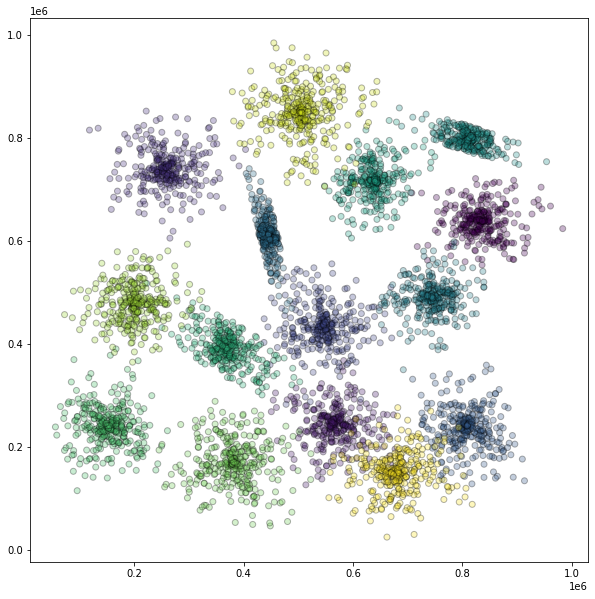

In [0]:

points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format
(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')
plt.show()

In [0]:
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score as si
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_mutual_info_score as adj_mi
from sklearn.metrics import mutual_info_score as mi


In [0]:
#Getting best params....


i_ = ['k-means++', 'random']
dis_ = ['auto',True,False]
alg_methods = ['auto', 'full' ,'elkan']
best_param = []
true_num =  np.max(labels)
def get_params(alg_methods,i_,dis_):
  s_ = 0       #silhouette_score 
  mi_ = 0     #Mutual info score
  for a in alg_methods:
    for b in i_:   
        for c in dis_:
            KM = KMeans(n_clusters=true_num,random_state=42,init = b,precompute_distances = c,algorithm = a,n_jobs=-1)
            KM_pred = KM.fit_predict(points)
            score_sil = si(points, KM_pred)
            score_mi = mi(labels,KM_pred)
            if (s_< score_sil)&(mi_ < score_mi):
                s_ = score_sil
                mi_ = score_mi
                best_param = [b,c,a]
  return best_param,s_,mi_
 
 

cov_ = ['full', 'tied', 'diag', 'spherical']
init_ = ['kmeans','random']
reg = [1e-9, 1e-8, 1e-6, 1e-5, 1e-4]
best_GM = []
def get_GMparams(cov_,init_,reg):
  s_2 = 0       
  mi_2 = 0    
  for a in cov_:
    for b in init_:   
        for c in reg:
            GM = GaussianMixture(n_components=true_num, covariance_type=a,
                                 init_params = b,reg_covar = c,random_state=42)
            GM_pred = GM.fit_predict(points)
            score_sil2 = si(points, GM_pred)
            score_mi2 = mi(labels,GM_pred)
            if (s_2< score_sil2)&(mi_2 < score_mi2):
                s_2 = score_sil2
                mi_2 = score_mi2
                best_GM = [a,b,c]
  return best_GM,s_2,mi_2

 

bf =  [2,5,7,10]
thres = [5,10,15,20]
best_br = []
def get_brparams(bf,thres):
  s_ = 0       
  mi_ = 0  
  for a in bf:
    for b in thres: 
            BR = Birch(n_clusters=int(true_num), threshold=b, branching_factor= a, compute_labels=True)
            BR_pred = BR.fit_predict(points)
            score_sil = si(points, BR_pred)
            score_mi = mi(labels,BR_pred)
            if (s_< score_sil)&(mi_ < score_mi):
                s_ = score_sil
                mi_ = score_mi
                best_br = [a,b]
  return best_br,s_,mi_


aff =  ['euclidean', 'l1', 'l2', 'manhattan', ]
link = ['complete', 'average','single']
best_ac = []
def get_acparams(aff,link):
  s_ = 0       
  mi_ = 0  
  for a in aff:
    for b in link: 
            AC = AgglomerativeClustering(n_clusters=true_num, affinity=a, linkage= b)
            AC_pred = AC.fit_predict(points)
            score_sil = si(points, AC_pred)
            score_mi = mi(labels,AC_pred)
            if (s_< score_sil)&(mi_ < score_mi):
                s_ = score_sil
                mi_ = score_mi
                best_ac = [a,b]
  return best_ac,s_,mi_

In [0]:
bst, s,m =    get_params(alg_methods,i_,dis_)
bst_gm,s_gm,m_gm = get_GMparams(cov_,init_,reg)
bst_ac,s_ac,m_ac = get_acparams(aff,link)
bst_br,s_br,m_br =   get_brparams(bf,thres)

In [0]:
print('silhouette score for True labels: ', si(points, labels))
print('\n')

print("Kmeans")
print("silhouette_score: ", s)
print("mutual_info_score: ", m)
print('init: "{}", precompute_distances: "{}" , algorithm: "{}"'.format(bst[0],bst[1],bst[2])) 

print('\n')
print("Gaussian Mixture")
print("silhouette_score: ", s_gm)
print("mutual_info_score: ", m_gm)
print('covariance_type: "{}", init_params: "{}" , reg_covar: "{}"'.format(bst_gm[0],bst_gm[1],bst_gm[2])) 
print('\n')

print("Birch ")
print("silhouette_score: ", s_br)
print("mutual_info_score: ", m_br)
print('Batching Factor: "{}", threshold: "{}"'.format(bst_br[0],bst_br[1])) 
print('\n')

print("Agglomerative Clustering")
print("silhouette_score: ", s_ac)
print("mutual_info_score: ", m_ac)
print('affinity: "{}", linkage: "{}"'.format(bst_ac[0],bst_ac[1]))   

silhouette score for True labels:  0.6088944608894215


Kmeans
silhouette_score:  0.6261838407811854
mutual_info_score:  2.5606860808689094
init: "random", precompute_distances: "auto" , algorithm: "auto"


Gaussian Mixture
silhouette_score:  0.6227272338562463
mutual_info_score:  2.5671662542723
covariance_type: "full", init_params: "kmeans" , reg_covar: "1e-09"


Birch 
silhouette_score:  0.6075939207380119
mutual_info_score:  2.5077832875665407
Batching Factor: "2", threshold: "5"


Agglomerative Clustering
silhouette_score:  0.6091772373449134
mutual_info_score:  2.519454846864759
affinity: "euclidean", linkage: "average"


In [0]:
# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution

Kmeans- Clustering


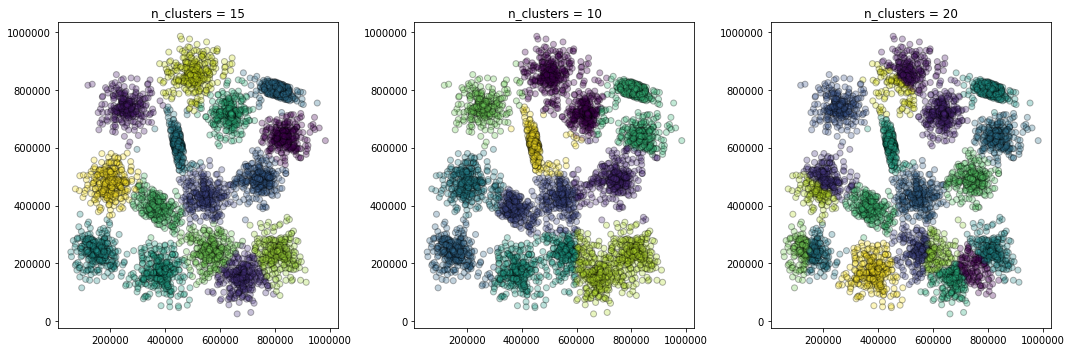

Gaussian Mixture


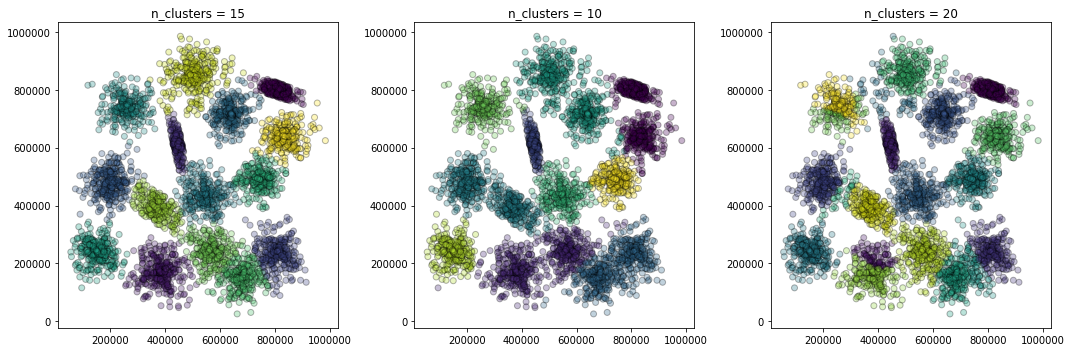

Birch Mixture


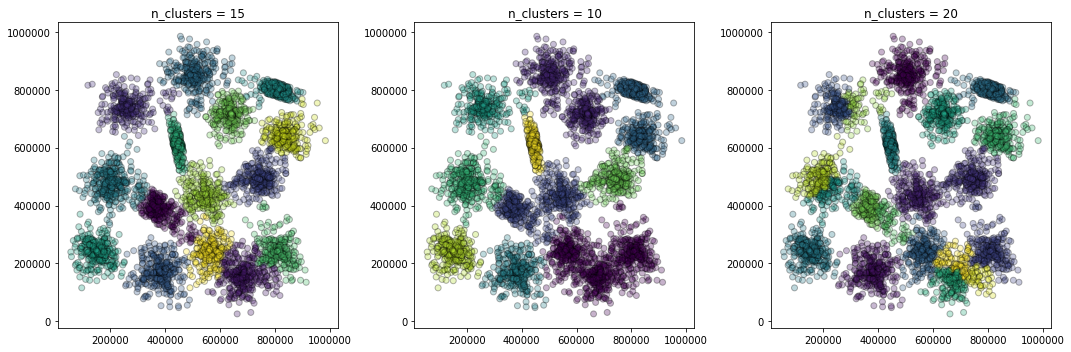

Agglomerative Clustering


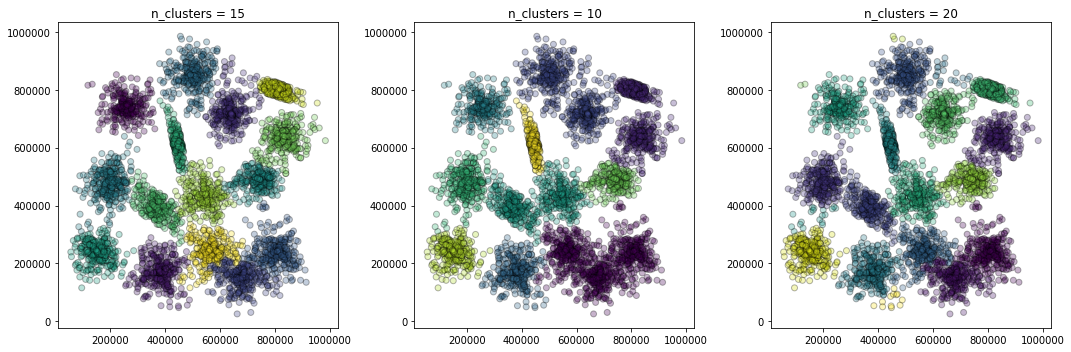

In [0]:
#kmeans....
n_clusters = [15,10,20]
KM_si = []
KM_adjmi = []
KM_mi = []
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
print("Kmeans- Clustering")    
for ax, i in zip(axes.flat, n_clusters):
    KM = KMeans(n_clusters=i, random_state=42,init=bst[0],precompute_distances=bst[1],
                    algorithm=bst[2])
    KM_pred = KM.fit_predict(points)
    KM_si.append(si(points, KM_pred))
    KM_adjmi.append(adj_mi(labels,KM_pred))
    KM_mi.append(mi(labels,KM_pred)) 
    ax.scatter(points[:, 0], points[:, 1], c=KM_pred, alpha=0.3, edgecolor='k')
    ax.set_title("n_clusters = {}".format(i))
plt.tight_layout()
plt.show()

#Gaussian Mixture....
n_clusters = [15,10,20]
GM_si = []
GM_adjmi = []
GM_mi =  []
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
print("Gaussian Mixture")    
for ax, i in zip(axes.flat, n_clusters):
    GM = GaussianMixture(n_components=i, covariance_type=bst_gm[0], init_params =bst_gm[1], 
                                 reg_covar = bst_gm[2],random_state=42)
    GM_pred = GM.fit_predict(points)
    GM_si.append(si(points, GM_pred))
    GM_adjmi.append(adj_mi(labels,GM_pred))
    GM_mi.append(mi(labels,GM_pred)) 
    ax.scatter(points[:, 0], points[:, 1], c=GM_pred, alpha=0.3, edgecolor='k')
    ax.set_title("n_clusters = {}".format(i))
plt.tight_layout()
plt.show()



#Birch Mixture...
n_clusters = [15,10,20]
BR_si = []
BR_adjmi = []
BR_mi =  []
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
print("Birch Mixture")    
for ax, i in zip(axes.flat, n_clusters):
    BR = Birch(n_clusters=i, threshold=bst_br[1], branching_factor=bst_br[0])
    #print('Batching Factor: "{}", threshold: "{}"'.format(bst_br[0],bst_br[1])) 
    BR_pred = BR.fit_predict(points)
    BR_si.append(si(points, BR_pred))
    BR_adjmi.append(adj_mi(labels,BR_pred))
    BR_mi.append(mi(labels,BR_pred)) 
    ax.scatter(points[:, 0], points[:, 1], c=BR_pred, alpha=0.3, edgecolor='k')
    ax.set_title("n_clusters = {}".format(i))
plt.tight_layout()
plt.show()


#Agglomerative ////
n_clusters = [15,10,20]
AC_si = []
AC_adjmi = []
AC_mi =  []
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
print("Agglomerative Clustering")    
for ax, i in zip(axes.flat, n_clusters):
    AC = AgglomerativeClustering(n_clusters=i, affinity=bst_ac[0], linkage=bst_ac[1])
    #print('affinity: "{}", linkage: "{}"'.format(bst_ac[0],bst_ac[1])) 
    AC_pred = AC.fit_predict(points)
    AC_si.append(si(points, AC_pred))
    AC_adjmi.append(adj_mi(labels,AC_pred))
    AC_mi.append(mi(labels,AC_pred)) 
    ax.scatter(points[:,0], points[:, 1], c=AC_pred, alpha=0.3, edgecolor='k')
    ax.set_title("n_clusters = {}".format(i))
plt.tight_layout()
plt.show()

In [0]:
n_clusters = range(10,20)
KM_si = []
KM_mi = []
GM_si = []
GM_mi = []
BR_si =[]
BR_mi = []
AC_si = []
AC_mi = []

for i in  (n_clusters):
    KM = KMeans(n_clusters=i, random_state=42,init=bst[0],precompute_distances=bst[1],
                    algorithm=bst[2])
    KM_pred = KM.fit_predict(points)
    KM_si.append(si(points, KM_pred))
    KM_mi.append(mi(labels,KM_pred)) 

for i in  (n_clusters):
    GM = GaussianMixture(n_components=i, covariance_type=bst_gm[0], init_params =bst_gm[1], 
                                 reg_covar = bst_gm[2],random_state=42)
    GM_pred = GM.fit_predict(points)
    GM_si.append(si(points, GM_pred))
    GM_mi.append(mi(labels,GM_pred)) 

for i in (n_clusters):
    BR = Birch(n_clusters=i, threshold=bst_br[1], branching_factor=bst_br[0])
    #print('Batching Factor: "{}", threshold: "{}"'.format(bst_br[0],bst_br[1])) 
    BR_pred = BR.fit_predict(points)
    BR_si.append(si(points, BR_pred))
    BR_mi.append(mi(labels,BR_pred)) 
    
for i in (n_clusters):
    AC = AgglomerativeClustering(n_clusters=i, affinity=bst_ac[0], linkage=bst_ac[1])
    #print('affinity: "{}", linkage: "{}"'.format(bst_ac[0],bst_ac[1])) 
    AC_pred = AC.fit_predict(points)
    AC_si.append(si(points, AC_pred))
    AC_mi.append(mi(labels,AC_pred)) 
    

In [0]:
# vizualize the clustering result, calculate the clustering metrics and plot them;
### BEGIN Solution

# >>> your solution here <<<

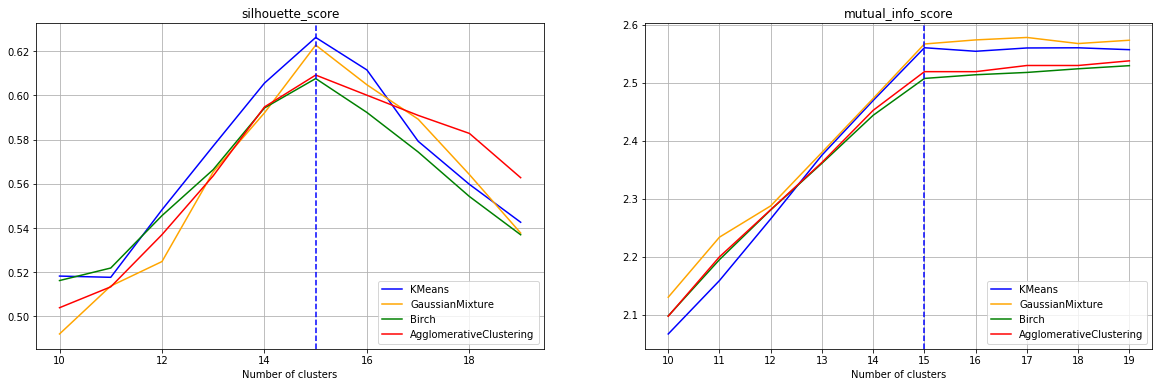

In [0]:
#plot of the silhoutte score for each clutering method....
_, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))
ax1.plot(n_clusters, KM_si, color = 'b', label='KMeans')
ax1.plot(n_clusters, GM_si, color = 'orange', label='GaussianMixture')
ax1.plot(n_clusters, BR_si, color = 'g', label='Birch')
ax1.plot(n_clusters, AC_si, color = 'r', label='AgglomerativeClustering')
ax1.axvline(15, color='b',linestyle='--')
ax1.set_xlabel('Number of clusters')
ax1.set_title("silhouette_score")
ax1.legend(loc=4)
ax1.grid()


#plot of the mutual info score...
ax2.plot(n_clusters, KM_mi, color = 'b', label='KMeans')
ax2.plot(n_clusters, GM_mi,color = 'orange', label='GaussianMixture')
ax2.plot(n_clusters, BR_mi,color = 'g', label='Birch')
ax2.plot(n_clusters, AC_mi,color = 'r', label='AgglomerativeClustering')
ax2.set_xlabel('Number of clusters')
ax2.set_title("mutual_info_score")
ax2.legend(loc=4)
ax2.axvline(15, color='b',linestyle='--')
ax2.set_xticks(n_clusters)
ax2.grid()
plt.show()

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import scipy
from tqdm import tqdm_notebook, tqdm
from scipy import stats
### BEGIN Solution
cluster_ns = np.arange(10,20)# >>> your solution here <<<
sample_number = 50# >>> your solution here <<<
df = np.zeros((cluster_ns.shape[0], 3))
for i, n_clusters in enumerate(cluster_ns):
    # >>> your solution here <<<
    print('\nNumber of clusters: ', n_clusters)
    k_means.n_clusters = n_clusters
    score_ = np.zeros(sample_number)
    for j in  tqdm_notebook(range(sample_number)):
        i_ = np.random.randint(low=0, high=points.shape[0],size=points.shape[0]//2)
        k_means.fit(points[i_])
        score_[j] = si(points[i_],k_means.predict(points[i_]))
    c1, c2 = stats.norm.interval(0.95, loc=score_.mean(), scale=score_.std())
    df[i,0] = c1
    df[i,1] = c2
    df[i,2] = score_.mean()
    print('Variance:', score_.std()**2)
    print('Confidence_interval:', (c1, c2))        


Number of clusters:  10



Variance: 4.689625982030216e-05
Confidence_interval: (0.5071313238568551, 0.5339753213940523)

Number of clusters:  11



Variance: 6.72052984160108e-05
Confidence_interval: (0.5223490584291784, 0.5544841723326682)

Number of clusters:  12



Variance: 3.8291355634866184e-05
Confidence_interval: (0.5501306442693017, 0.5743871622271532)

Number of clusters:  13



Variance: 4.6853468168044195e-05
Confidence_interval: (0.5730848708688564, 0.599916618376184)

Number of clusters:  14



Variance: 3.3462900198622885e-05
Confidence_interval: (0.6032991520731116, 0.625974808900115)

Number of clusters:  15



Variance: 3.2450999732592435e-05
Confidence_interval: (0.6168745965569563, 0.6392047715820751)

Number of clusters:  16



Variance: 4.1301207734260406e-05
Confidence_interval: (0.5984458027441637, 0.6236376179829348)

Number of clusters:  17



Variance: 5.6106480414463034e-05
Confidence_interval: (0.580847061202592, 0.6102089912540203)

Number of clusters:  18



Variance: 0.0001105200961362135
Confidence_interval: (0.5588388156613592, 0.6000484455148981)

Number of clusters:  19



Variance: 0.00011349399245365191
Confidence_interval: (0.5428682249858885, 0.5846286128388227)


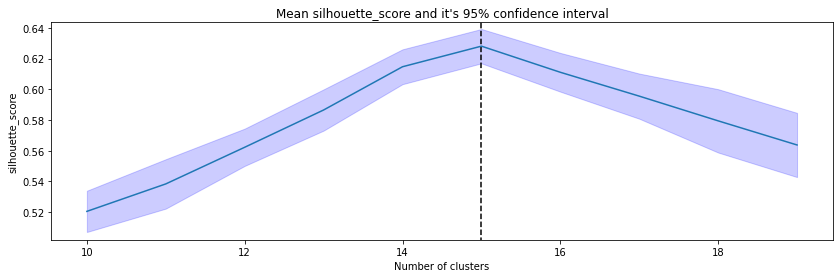

In [0]:
plt.figure(figsize=(14,4))
plt.fill_between(np.arange(10,20), df[:,0], df[:,1],color='b', alpha=.2)
plt.plot(np.arange(10,20), df[:,2])
plt.vlines(np.argmax(df[:,2])+10, 0.5, 0.8, linestyle='--')
plt.ylim(df[:,0].min()*0.99, data[:,1].max()*1.01)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.title("Mean silhouette_score and it's 95% confidence interval")
#plt.grid()
plt.show()
### END Solution

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)
### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case use can use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
dg = datasets.load_digits()
data = StandardScaler().fit_transform(dg.data)

In [0]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

- Estimate the intrinsic dimentionality of the dataset. Provide the plot.

In [0]:
# Estimate the intrinsic dimentionality of the dataset. 
### BEGIN Solution
repeated_K = np.array(repeated(intrinsic_dim_scale_interval, data, mode='bootstrap', nb_iter=5,k1=2, k2=65))

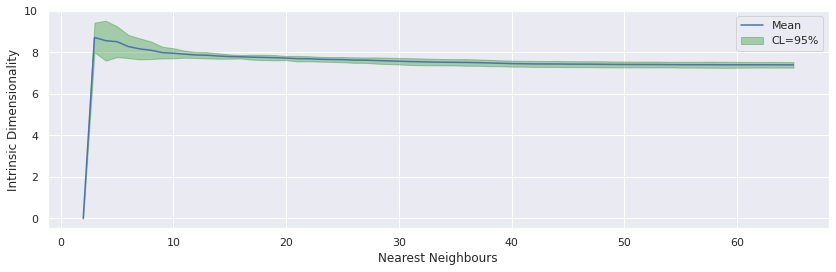

In [0]:
fig = plt.figure(figsize=(14,4))
plt.xlabel("Nearest Neighbours")
plt.ylabel("Intrinsic Dimensionality")

plt.plot(range(2, 66), np.mean(repeated_K, axis=0),label='Mean')
plt.fill_between(range(2,66), np.mean(repeated_K, axis=0) + 1.96*np.std(repeated_K, axis=0),
                 np.mean(repeated_K, axis=0) - 1.96*np.std(repeated_K, axis=0), alpha=0.3, 
                 color='green',label='CL=95%')

plt.legend()
plt.grid(True)
plt.show()
### END Solution

- Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component.

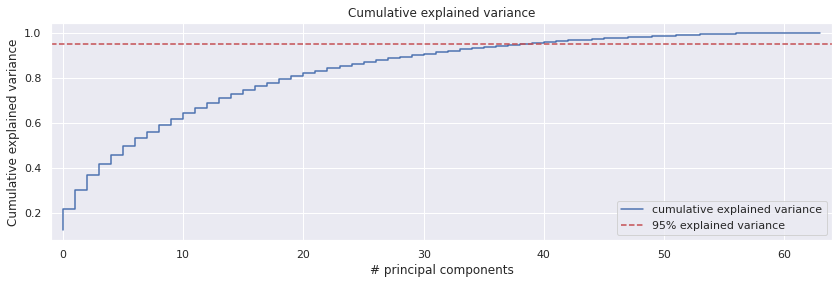

In [0]:
from sklearn.decomposition import PCA
n = 64
pca = PCA(n_components=n)
pca = PCA().fit(data)
plt.figure(figsize=(14,4))
m = pca.explained_variance_ratio_
plt.step(range(64),np.cumsum(m),color='b',label='cumulative explained variance')
plt.title('Cumulative explained variance')
plt.xlabel('# principal components')
plt.ylabel('Cumulative explained variance')
plt.xlim(-1, 64)
plt.axhline(0.95, c='r', label='95% explained variance',linestyle='--')
plt.legend(loc=4)
plt.grid(True)

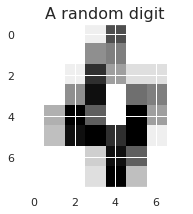

In [0]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()
y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

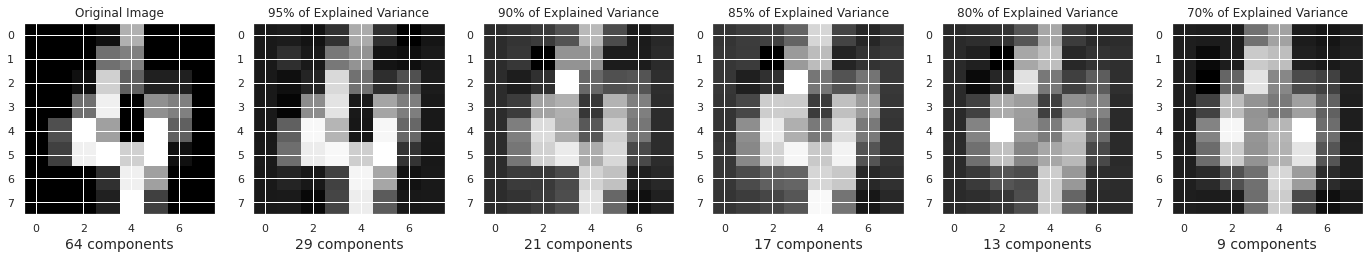

In [0]:
### BEGIN Solution
EI = [0.95,0.90,0.85,0.8, 0.7]
def get_images(img,EI):
    plt.figure(figsize=(24,4))
    plt.subplot(1, 6, 1);
    plt.imshow(img[4].reshape(8,8),cmap = plt.cm.gray, interpolation='nearest');
    plt.xlabel('{} components'.format(img[4].shape[0]), fontsize = 14)
    plt.title('Original Image', fontsize = 12)
    
    i = 2
    for n_ in EI:
        pca = PCA(n_)
        X_redc = pca.fit_transform(img)
        X_ = pca.inverse_transform(X_redc)
        plt.subplot(1, 6, i)
        i += 1 
        plt.imshow(X_[4].reshape(8, 8),cmap=plt.cm.gray, interpolation='nearest')
        plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
        plt.title('{}% of Explained Variance'.format(int(n_*100)), fontsize = 12)
    plt.show()
D_img = np.reshape(dg.images,(len(dg.images),-1))
get_images(D_img,EI) 
### END Solution   

### Task 3.2. (2 points)

Here we will visualise the decomposition in order to observe how data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Make sure the data is whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [0]:
import pandas as pd
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))  

import plotly        
import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl
init_notebook_mode(connected=True)

In [0]:
# import plotly
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objs as go
# import colorlover as cl
# init_notebook_mode(connected=True)

In [0]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
### BEGIN Solution
digits = datasets.load_digits()
data = StandardScaler().fit_transform(digits.data)

# >>> your solution here <<<
pca = PCA(n_components=3)
ica = FastICA(n_components=3)
iso = Isomap(n_neighbors=5, n_components=3, eigen_solver='dense')
S_pca_ = pca.fit_transform(data)
S_ica_ = ica.fit_transform(data)
S_iso_ = iso.fit_transform(data)
### END Solution

In [0]:
digits_3d = pd.DataFrame({
    'x': S_pca_[:, 0], 
    'y': S_pca_[:, 1], 
    'z': S_pca_[:, 2],
    'label': dg['target'],
})
colors = cl.scales['10']['qual']['Paired']
data = []
for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    color = colors[i]
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

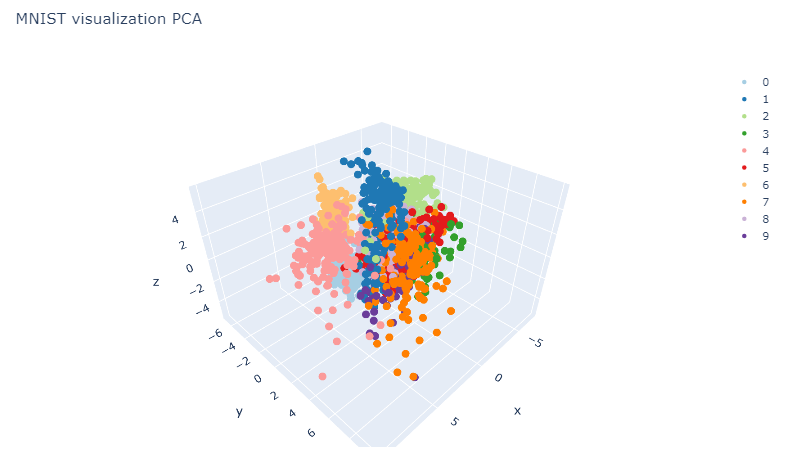

In [1]:
from IPython.display import Image
Image("pca.png")

In [0]:
digits_3d = pd.DataFrame({
    'x': S_ica_[:, 0], 
    'y': S_ica_[:, 1], 
    'z': S_ica_[:, 2],
    'label': dg['target'],
})
colors = cl.scales['10']['qual']['Paired']
data = []
for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    color = colors[i]
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization with FastICA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

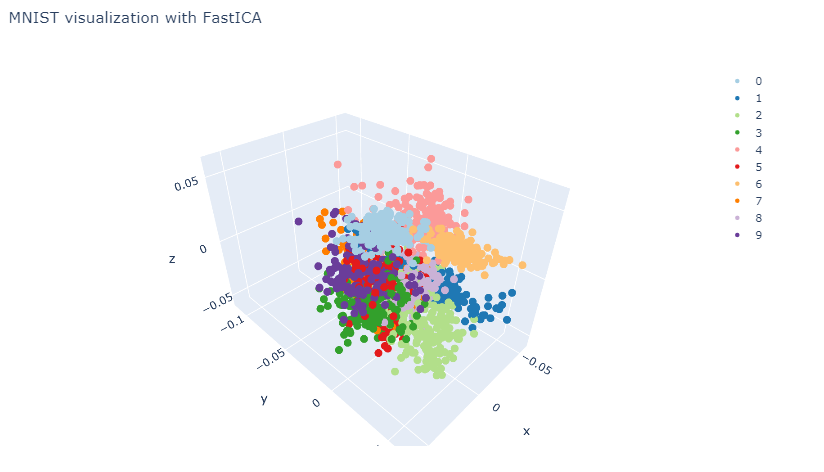

In [2]:
from IPython.display import Image
Image("ICA.png")

In [0]:
digits_3d = pd.DataFrame({
    'x': S_iso_[:, 0], 
    'y': S_iso_[:, 1], 
    'z': S_iso_[:, 2],
    'label': dg['target'],
})
colors = cl.scales['10']['qual']['Paired']
data = []
for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    color = colors[i]
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization with ISOMAP',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

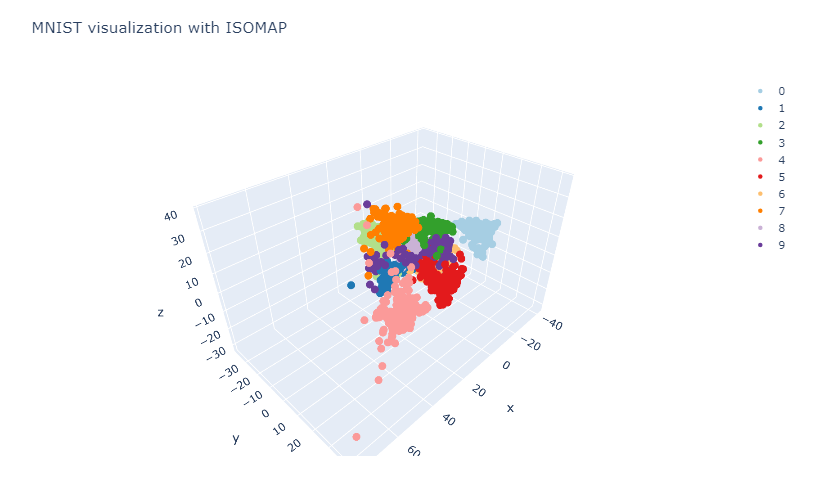

In [3]:
from IPython.display import Image
Image("capture.png")

- Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 


In [0]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import sklearn.manifold

logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

### BEGIN Solution
X_pca = PCA(n_components=8,random_state=42).fit_transform(digits.data)
X_iso = sklearn.manifold.Isomap(n_components=8).fit_transform(digits.data)
X_ica =  FastICA(n_components=8,random_state=42).fit_transform(digits.data)
X = [X_pca,X_ica,X_iso]
method = ['PCA','ICA','Isomap']
scores= list()
result_df = pd.DataFrame(columns=['dim.reduction method','mean accuracy','std'])
sc_mean = []
sc_std = []
for x in X:
    sc = cross_val_score(logreg, x, digits.target,scoring='accuracy', cv=rkf)
    scores.append(sc)
    sc_mean.append(sc.mean())
    sc_std.append(sc.std())
result_df['dim.reduction method'] = method
result_df['mean accuracy'] = sc_mean
result_df['std'] = sc_std
### END Solution

In [0]:
display(result_df)

dim.reduction method  mean accuracy       std
0                  PCA       0.903917  0.014195
1                  ICA       0.783351  0.025221
2               Isomap       0.973652  0.009815

 - Show that the Isomap gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding p-values. 

In [0]:
# >>> your solution here <<<
from scipy.stats import ttest_ind
t2, val_1 = ttest_ind(scores[0], scores[1])
print('Statistically significant improvement of PCA decomposition over ICA: p-value ', val_1)

Statistically significant improvement of PCA decomposition over ICA: p-value  2.4892585121538826e-15


In [0]:
# >>> your code here <<<
t1, val_2 = ttest_ind(scores[2], scores[0])
print('Statistically significant improvement of Isomap decomposition over PCA: p-value ', val_2)

Statistically significant improvement of Isomap decomposition over PCA: p-value  5.3523662688841654e-15



- Justify your answer in 2-3 sentences...

- As shown above, it can be seen that Isomap performed better than(PCA and ICA).

- The better performance of ISOMAP shows the distinction between linear (ICA, PCA) and non-linear (Isomap)dimensionality reduction methods  

- the performance of ISOMAP shows that it works better with huge data that has non-linear structure dependencies for dimentionality reduction process

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

def load(f):
    return np.load(f)['arr_0']

### BEGIN Solution
# Load the data
x_train = load('data/kmnist-train-imgs.npz')
x_test = load('data/kmnist-test-imgs.npz')
y_train = load('data/kmnist-train-labels.npz')
y_test = load('data/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

pca = PCA(n_components= 60, random_state= 42)
x_train = pca.fit_transform(x_train)
x_test =  pca.transform(x_test)
KNN_clf = KNeighborsClassifier(n_neighbors= 4,weights='distance', n_jobs=-1)
KNN_clf.fit(x_train, y_train)
# >>> your solution here <<<

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
print("Accuracy on test data: ", KNN_clf.score(x_test,y_test))

Accuracy on test data:  0.9399


In [0]:
x_train.shape

(60000, 60)

In [0]:
df = x_train[:,:3]
df.shape

(60000, 3)

In [0]:
from numpy import savetxt
# save to csv file
savetxt('df.csv', df, delimiter=',')

- Is it fair to `fit` with manifold Learning method for both train and test samples? 

- It is not a fair action to fit manifold learning on both train and test samples.

- when this is done, the process provides us with information about the test samples during teh training process, which is not so good

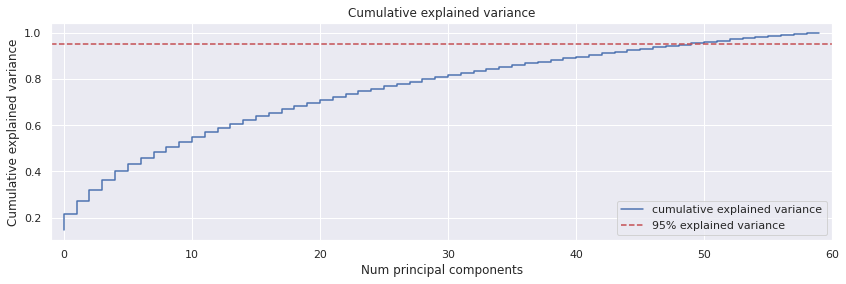

In [0]:
#n = 400
pca_ = PCA(n_components=400)
pca_ = PCA().fit(x_train)
plt.figure(figsize=(14,4))
m = pca_.explained_variance_ratio_
plt.step(range(pca_.n_components_),np.cumsum(m),color='b',label='cumulative explained variance')
plt.title('Cumulative explained variance')
plt.xlabel('Num principal components')
plt.ylabel('Cumulative explained variance')
plt.xlim(-1,60)
plt.axhline(0.95, c='r', label='95% explained variance',linestyle='--')
plt.legend(loc=4)
plt.grid(True)

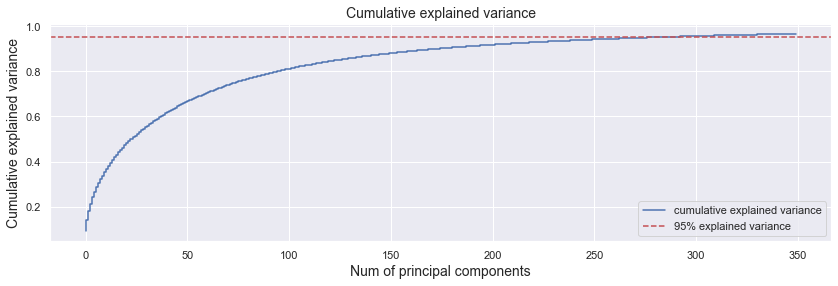

In [0]:
# >>> your solution here <<<


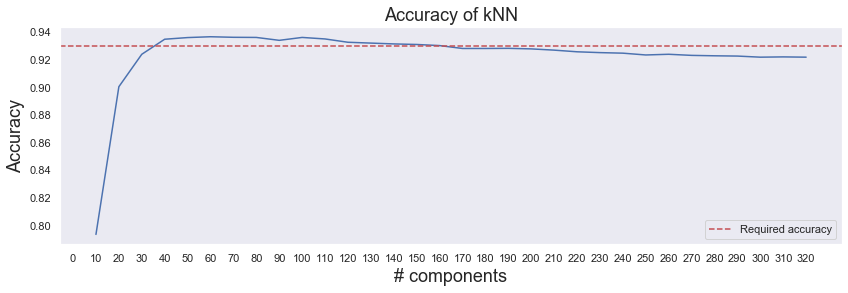

In [0]:
# >>> your solution here <<<
### END Solution

#### Voilla! you are done, have a good day ;)